# Was ist PCA?

PCA bedeutet **Principal Component Analysis / Hauptkomponentenzerlegung** und ist ein Algorithmus, welcher zur Veranschaulichung und Strukturierung von umfangreichen Datensätzen eingesetzt werden kann [Quelle](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse#:~:text=Die%20Hauptkomponentenanalyse%20(kurz%3A%20HKA%2C,ein%20Verfahren%20der%20multivariaten%20Statistik.).

Ein sehr gutes Erklärvideo ist unter folgendem [Link]() verfügbar.

Stellen wir uns einmal vor, dass wir Gene auf einem Graphen darstellen wollen. Jedes Gen hat hierbei eine Dimension für Cell1 und Cell2. Dies lässt sich noch gut auf einem 2D Graphen darstellen.
![Daten auf 2D Graph visualisieren](./assets/visualize-data-2d-graph.png "Daten auf 2D Graph visualisieren")

Was jedoch passiert bei einer 3, 4, 5...100 Dimension, da wird es schon schwieriger.
Genau hier kann uns PCA weiterhelfen. PCA generiert für jede Dimension eine Achse. Die Achsen repräsentieren hierbei die Variationen, wobei gilt dass PC1 die meiste Variation aufweist, PC2 die zweitmeiste etc.
![PCA Achsen](./assets/pca-axis.png "PCA Achsen")


# Wie hilft nun PCA hier weiter?

Es gibt nun zwei Möglichkeiten mit Datensätzen mit sehr vielen Variablen umzugehen. Entweder werden einige Variablen gestrichen, welche als nicht relevant betrachtet werden. Das Problem dabei ist, dass man von den entfernten Variablen keine Informationen mehr erhält und es besteht die Gefahr so wichtige Daten zu verlieren.

Die zweite Option nennt sich Feature extraction, dabei werden neuen Variablen erstellt. Dabei ist jede neue Variable eine Kombination aus den ursprünglichen Variablen. Diese neuen Variablen werden dabei in einer Art erstellt und geordent wie gut sie den ursprünglichen Datensatz repräsentieren. Zu diesem Zeitpunkt sind die neuen Variablen noch immer so umfassend wie die urspünglichen. Durch die Art und Weise wie diese neuen Variablen erstellt wurden, können nun die am wenigsten wichtigen Variablen entfernt werden. Im Gegensatz zum direkten Entfernen von Variablen bleibt so ein grösserer Teil der Informationen erhalten.

PCA ist eine Technik die mit Feature extraction arbeitet. So werden die Variablen kombiniert und die unwichtigsten Variablen werden entfernt um so eine Dimensionsreduktion zu erreichen. 
**[Quelle](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)**

# Berechnung von PCA

Zuerst werden die Daten bewertet, an Hand ihres Einflusses auf die PCA Achsen
![PCA Berechnung Schritt 1](./assets/pca-calculation-01.png "PCA Berechnung Schritt 1")
![PCA Berechnung Schritt 1 Tabellenansicht](./assets/pca-calculation-01-table.png "PCA Berechnung Schritt 1 Tabellenansicht")

Anschliessend kann ein einzelner Wert als Summe der Dimensionen * Einfluss auf die Achse berechnet werden
![PCA Berechnungsformel](./assets/pca-calculation-formula.png "PCA Berechnungsformel")


Vorgehen:
* Für jede Variable wird der Durchschnitt berechnet
* Aus den durchschnittswerten wird Mittelpunkt der Daten abgleitet
* Der Mittelpunkt wird als Ursprung für den neuen Vektorraum genommen
* Es wird eine Gerade durch den Ursprung gezogen
* Die Gerade wird so rotiert, dass sie den Datenpunkten am besten entspricht
** Um zu sehen wie gut die Gerade passt, werden die Datenpunkte auf die Gerade projeziert und geprüft wann der Abstand von der Gerade zu den Punkten sich minimiert oder der Abstand vom Ursprung zu den projezierten Punkten (PP) auf der Gerade maximiert wird.
** PCA arbeitet mit den PP auf der Gerade. Die erste Hauptkomponente ist an der Stelle wo die Summe der quadriederten Distanzen zwischen PP und dem Ursprung am höchsten ist. Die Summe wird auch Eigenwert genannt.
** Die Steigung der Gerade gibt an wie relevant die einzelnen Variablen des Datensatzes für diese Hauptkomponente ist 
* Die Länge der Geraden wird auf 1 gesetzt, dies ergibt den Eigenvektor für die 1. Hauptkomponente
* Nun wird eine neue Gerade orthogonal zu der vorherigen angesetzt und der Eigenwert und Eigenvektor berechnet. 
* Das Ganze wird für die gewünschte Anzahl Hauptkomponenten wiederholt (bis zu der maximalen Menge von p)
* Ordnen der Hauptkomponenten
** Für jede Hauptkomponente wird die Variation ausgerechnet: Eigenwert der Hauptkomponente / (n - 1)
** Die Totale Variation ergibt sich aus der Summe von den Variationen der Hauptkomponnten 
** Variation / Totale Variation zeigt die Relevanz der Hauptkomponente an (je höher desto wichtiger)

**[Quelle 1](https://www.youtube.com/watch?v=FgakZw6K1QQ)**
**[Quelle 2](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse)**

PCA ist eine unsupervise multivariant Statistik um Beziehungen zwischen variablen eines Datensatzes zu untersuchen.

# Beispiel mit Boston Housing Datensatz

Der Boston Housing Datensatz beschreibt die Wohnverhältnisse in 506 Gebieten von Boston auf Basis einer Erhebung aus dem Jahr 1970. [Quelle](https://de.wikipedia.org/wiki/Portal:Statistik/Datens%C3%A4tze#:~:text=Der%20Boston%20Housing%2DDatensatz%20beschreibt,direkt%20am%20Charles%20River%20liegt.)

Jedes dieser 506 Gebiete hat 13 Features / Eigenschaften. Diese sind:

**CRIM**:Verbrechensrate pro Stadt

**ZN**: Anteil des Wohngrundstücks für Grundstücke über 25.000 m². 

**INDUS**: Anteil der Hektar außerhalb des Einzelhandels pro Stadt.

**CHAS**: Charles River Dummy-Variable (= 1, wenn der Trakt den Fluss begrenzt; sonst 0).

**NOX**: Stickoxidkonzentration (Teile pro 10 Millionen).

**RM**: Durchschnittliche Anzahl der Zimmer pro Wohnung.

**AGE**: Anteil der vor 1940 gebauten Eigentumswohnungen.

**DIS**: Gewichteter Mittelwert der Entfernungen zu fünf Bostoner Beschäftigungszentren.

**RAD**: Index der Zugänglichkeit zu radialen Autobahnen.

**TAX**: Full-Value-Grundsteuersatz pro 10.000 US-Dollar.

**PTRATIO**: Schüler-Lehrer-Verhältnis nach Stadt.

**B**: 1000 (Bk - 0,63) ^ 2 wobei Bk der Anteil der Schwarzen pro Stadt ist.

**LSTAT**: Niedrigerer Status der Bevölkerung (Prozent).

[Quelle](https://www.kaggle.com/c/boston-housing)

Für den nachfolgenden Code wurde folgende [Quelle](https://www.kaggle.com/agnihotri/linear-regression-and-pca-boston-housing) zu Hilfe genommen.


In [12]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_breast_cancer

In [3]:
boston = load_boston() # Boston Datensatz laden
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
targets = boston["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.describe() # Hier sehen wir, dass die Skalierung nicht einheitlich ist, dass macht es schwierig den PCA korrekt anzuwenden.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


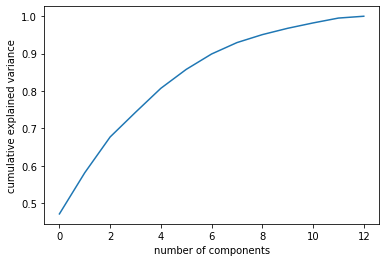

In [11]:
# Neuer Datensatz erzeugen mit normalisierten Daten
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)

# Wie stark kann eine Hauptkomponente erklären
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Text(0, 0.5, 'PC2')

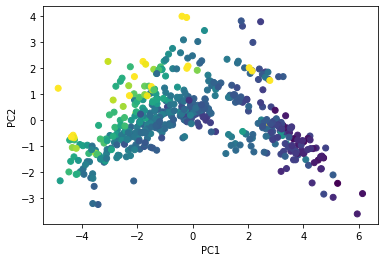

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_std)
X_pca.shape
pca_data_crim = X_pca[:,0]
pca_data_b = X_pca[:,1]

plt.scatter(X_pca[:,0], X_pca[:,1], c = targets)
plt.xlabel('PC1')
plt.ylabel('PC2')


## Beispiel mit  Breast Cancer Datensatz
**[Quelle](https://www.udemy.com/course/python-data-science-machine-learning/learn/lecture/7758154#overview)**

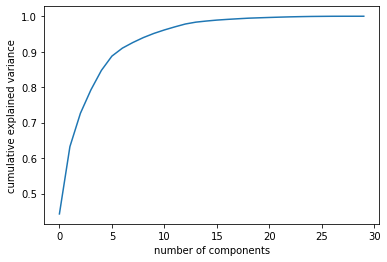

In [13]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns = cancer ['feature_names'])
scaler.fit(df)
scaled_data = scaler.transform(df)
pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Text(0, 0.5, 'Zweiter Principal Component')

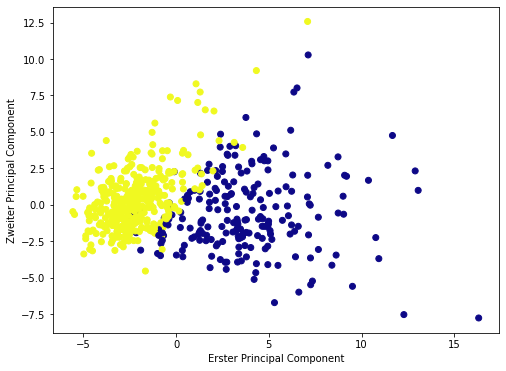

In [14]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('Erster Principal Component')
plt.ylabel('Zweiter Principal Component')

In [15]:
#Jede Zeile entspricht einen Principal Component und jede Spalte auf eine orginal Eigenschaft
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<AxesSubplot:>

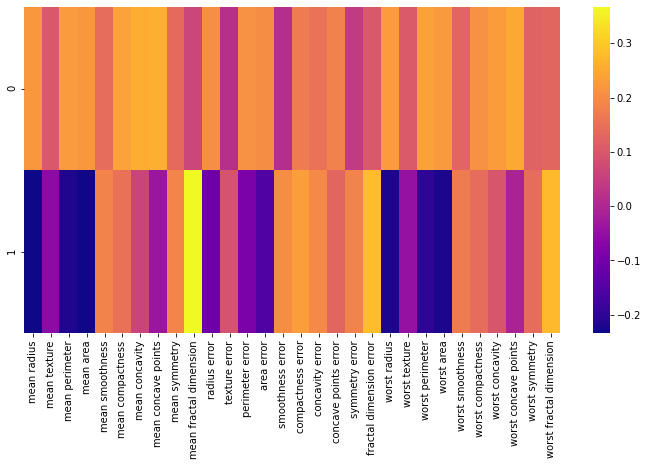

In [16]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
#df_comp mit Heatmap visualisieren, höherer Wert = höhere Korrelation
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')
#die beiden Zeilen sind die Principal Components